In [2]:
#ライブラリのインポート
import pandas as pd
import matplotlib.pyplot as pyplot
% matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import seaborn

In [12]:
#CSVファイルからDataFrameへロード
original_df = pd.read_csv("Titanictrain.csv")
original_df.head(6)
original_df2 = pd.read_csv('No-show-Issue-Comma-300k.csv')
original_df2.head(6)

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6
5,5,F,2014-06-17T06:47:27Z,2014-07-22T00:00:00Z,Tuesday,No-Show,0,0,0,0,0,0,0,1,-35


In [5]:
original_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a2ab390>,
      dtype=object)

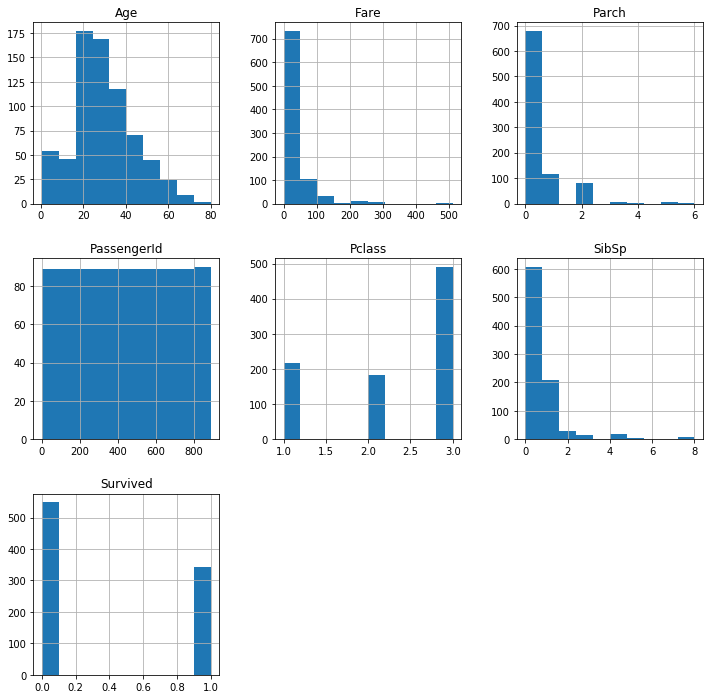

In [6]:
original_df.hist(figsize = (12,12))

In [10]:
features_df = pd.DataFrame()
#目的変数の抽出
features_df['Outcome'] = original_df['Survived']

In [33]:
#元データを説明変数に追加
features_df['Pclass'] = original_df['Pclass']
features_df['Sex'] = original_df['Sex'].apply(lambda s: 1 if s == 'male' else 0)
features_df['Age'] = original_df['Age']
features_df['SibSp'] = original_df['SibSp']
features_df['Parch'] = original_df['Parch']
features_df['Fare'] = original_df['Fare']


features_df['Age'].fillna(29) ## train_df.fillna(0) #nullに0をいれる
features_df.dropna() #nullが含まれる行を削除する
print(features_df.mean(numeric_only=True)) #数値列のみの平均値

Outcome     0.383838
Pclass      2.308642
Sex         0.647587
Age        29.699118
SibSp       0.523008
Parch       0.381594
Fare       32.204208
dtype: float64


In [23]:
# 予約日の曜日をone-hot-encoding
#d = pd.get_dummies(original_df['DayOfTheWeek'])
#features_df['AppointmentMonday'] = d['Monday']
#features_df['AppointmentTuesday'] = d['Tuesday']
#features_df['AppointmentWednesday'] = d['Wednesday']
#features_df['AppointmentThursday'] = d['Thursday']
#features_df['AppointmentFriday'] = d['Friday']
#features_df['AppointmentSaturday'] = d['Saturday']
#features_df['AppointmentSunday'] = d['Sunday']

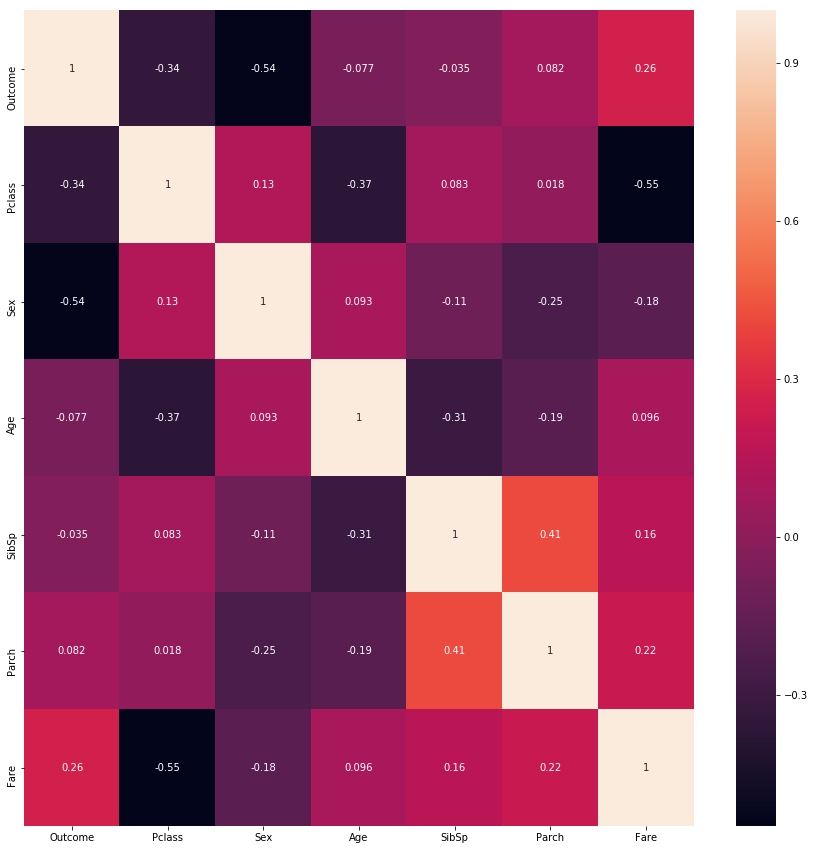

In [34]:
#各列の相関係数を求める
pyplot.figure(figsize=(15,15))
seaborn.heatmap(features_df.corr(), annot=True)

In [43]:
X = features_df.ix[:,'Fare':]
y = features_df['Outcome']

In [47]:
#学習データとテストデータの分離
X_train, X_test, y_train, y_test = train_test_split(X , y ,random_state= 0)
#ランダムフォレストの作成
forest = RandomForestClassifier(min_samples_leaf = 3 , random_state = 0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [48]:
print('Tarain score: {}' .format(forest.score(X_train , y_train)))
print('Test score: {}'.format(forest.score(X_test, y_test)))
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, forest.predict(X_test))))
print('f1 score:{:.3f}'.format(f1_score(y_test,forest.predict(X_test))))

Tarain score: 0.7634730538922155
Test score: 0.726457399103139
Confusion matrix:
[[111  28]
 [ 33  51]]
f1 score:0.626
